# Figure 1

In [1]:
library_load <- suppressMessages(
    
    list(
        
        # Data 
        library(tidyverse), 
        
        # Plot 
        library(ggplot2)
        
    )
)

In [2]:
# Set working directory to project root
setwd("/research/peer/fdeckert/FD20200109SPLENO")

In [3]:
options(warn=-1)

In [4]:
# Source files
source("plotting_global.R")
source("bin/SeuratQC.R")
source("../scFacility/script/dirFacility.R")

In [5]:
so_file <- "data/object/so_sct_reg.rds"

# Plotting Theme
ggplot2::theme_set(theme_global_set())

# Import data

In [6]:
so <- readRDS(so_file)

In [7]:
# Set meta data factor level for plotting 
so$leiden_annotation <- factor(so$leiden_annotation, levels=names(color$leiden_annotation))
so$label_fine_haemosphere <- factor(so$label_fine_haemosphere, levels=names(color$label_fine_haemosphere))
so$treatment <- factor(so$treatment, levels=names(color$treatment))
so$tissue <- factor(so$tissue, levels=names(color$tissue))

## UMAP 

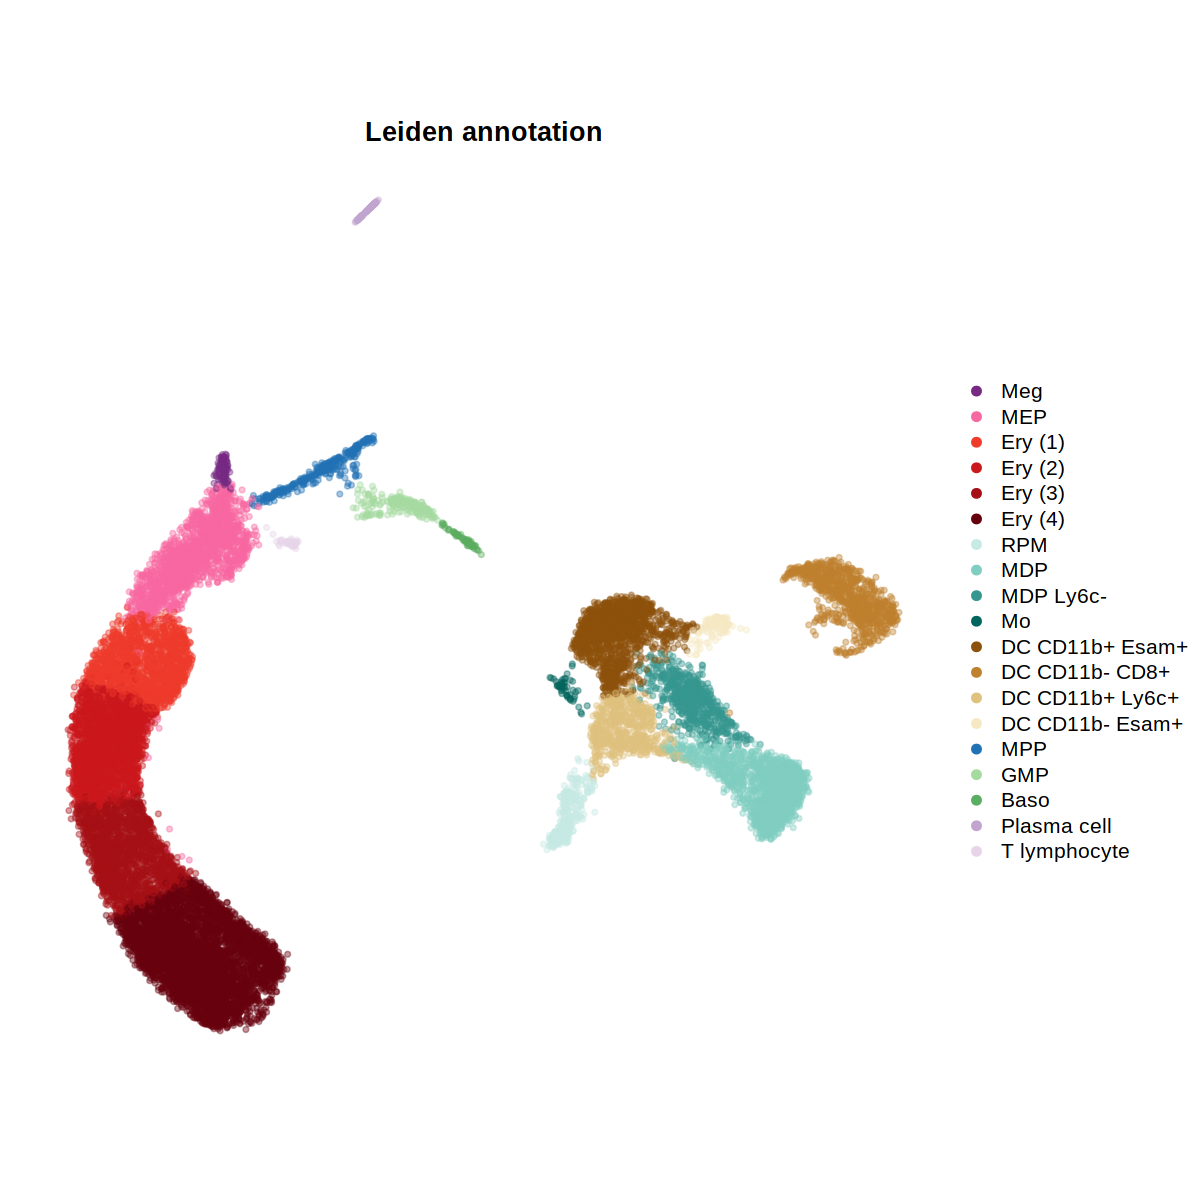

In [8]:
options(repr.plot.width=10, repr.plot.height=10)

dplot_1 <- dplot(so, reduction="X_umap", group_by="leiden_annotation", pt_size=1) + scale_color_manual(values=color$leiden_annotation) + ggtitle("Leiden annotation")

dplot_1

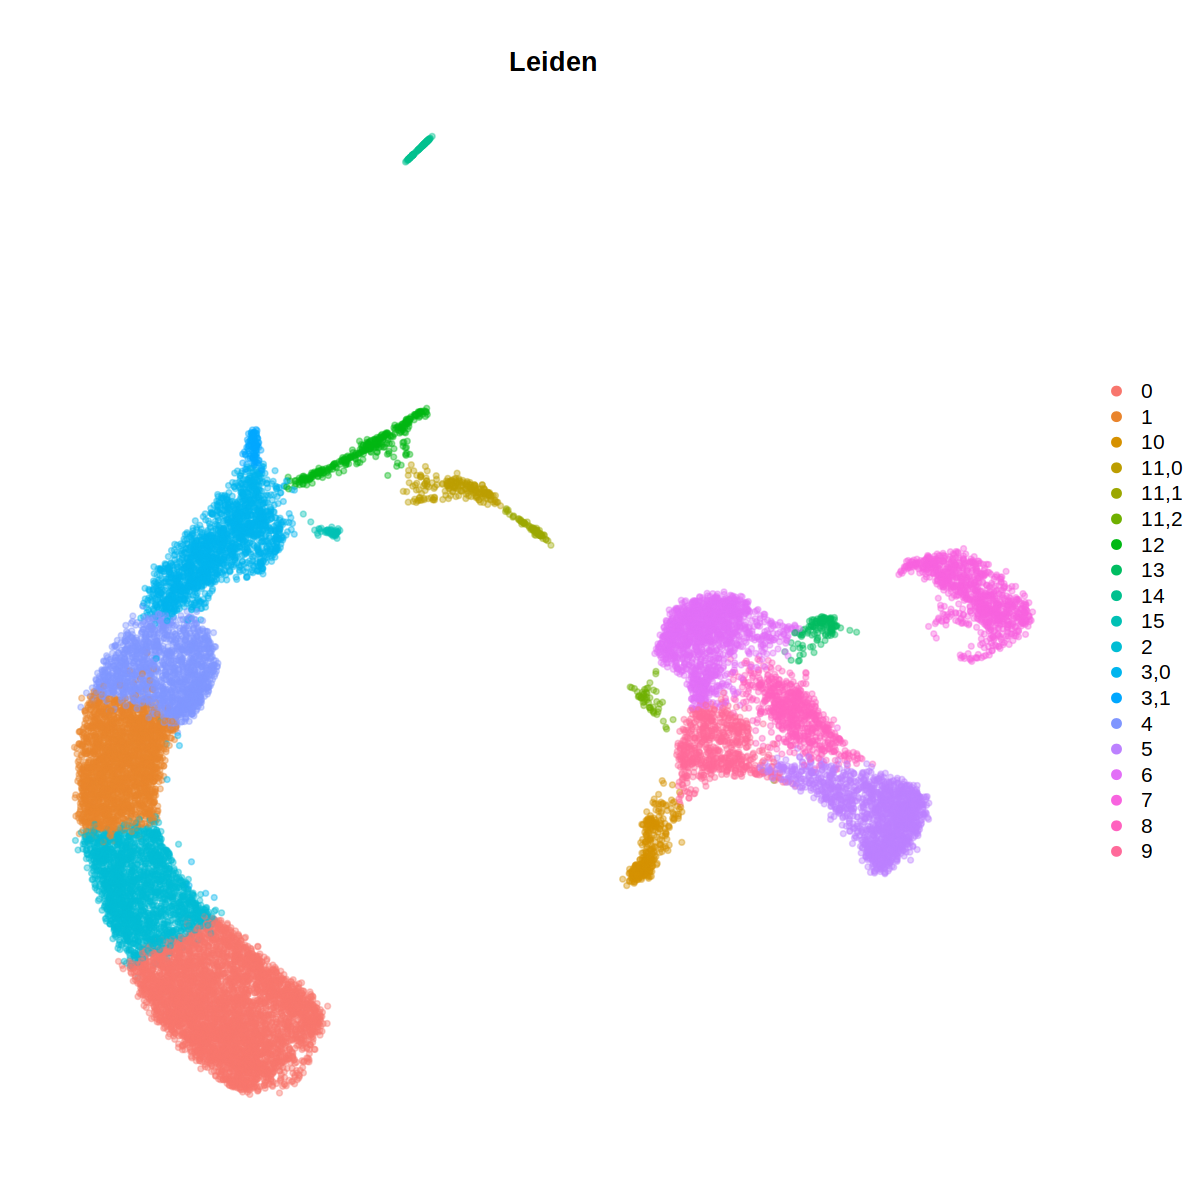

In [9]:
options(repr.plot.width=10, repr.plot.height=10)

dplot_1 <- dplot(so, reduction="X_umap", group_by="leiden_res", pt_size=1) + ggtitle("Leiden")

dplot_1

## Cell type composition 

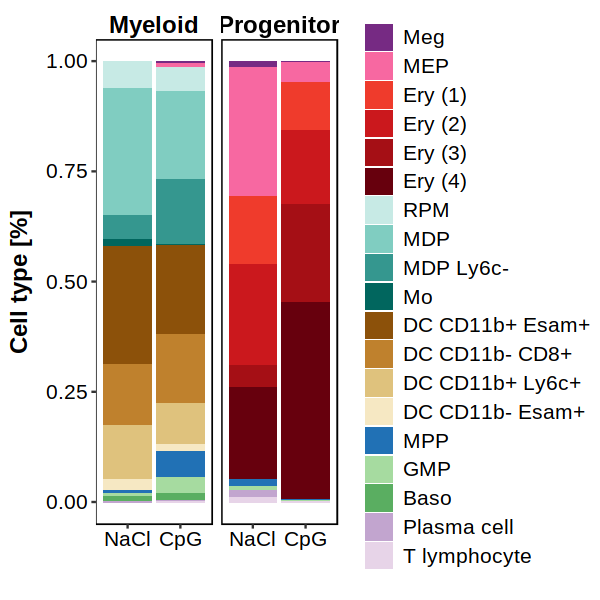

In [10]:
options(repr.plot.width=5, repr.plot.height=5)

ggplot(so@meta.data, aes(x=treatment, fill=leiden_annotation)) + 
    geom_bar(position = "fill") + 
    xlab("") + ylab("Cell type [%]") + 
    scale_fill_manual(values=color$leiden_annotation, name="") + 
    facet_wrap(~tissue)

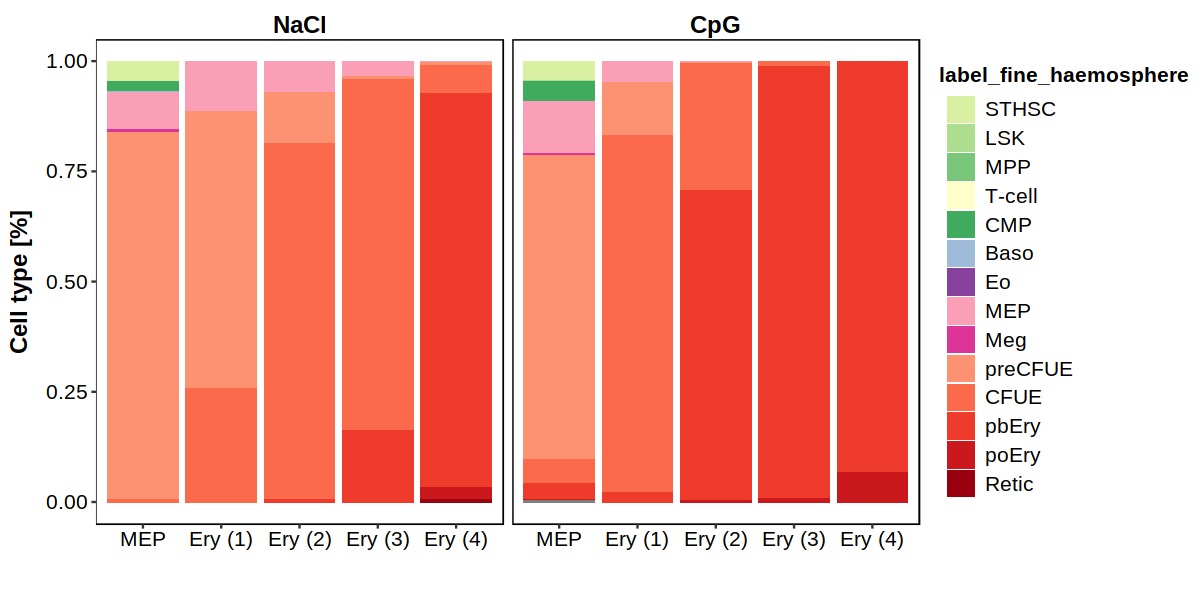

In [11]:
options(repr.plot.width=10, repr.plot.height=5)

leiden_annotation_ery <- c("MEP", "Ery (1)", "Ery (2)", "Ery (3)", "Ery (4)")
so_ery <- subset(so, subset = leiden_annotation %in% leiden_annotation_ery)

ggplot(subset(so_ery, leiden_annotation %in% leiden_annotation_ery)@meta.data, aes(x=leiden_annotation, fill=label_fine_haemosphere)) + 
    geom_bar(position = "fill") + 
    xlab("") + ylab("Cell type [%]") + 
    scale_fill_manual(values=color$label_fine_haemosphere[names(color$label_fine_haemosphere) %in% so_ery$label_fine_haemosphere]) + 
    facet_grid(~treatment)

# Marker genes along latent time 

In [12]:
# Import latent time from scvelo analysis 
latent_time <- rbind(
    read.csv("result/scvelo/latent_time_nacl.csv", row.names=1), 
    read.csv("result/scvelo/latent_time_cpg.csv", row.names=1)
            )
so <- AddMetaData(so, latent_time)

In [13]:
leiden_annotation_ery <- c("MEP", "Ery (1)", "Ery (2)", "Ery (3)", "Ery (4)")
so_ery <- subset(so, subset = leiden_annotation %in% leiden_annotation_ery)

In [14]:
latent_time

,root_cells,end_points,velocity_pseudotime,latent_time
,<dbl>,<dbl>,<dbl>,<dbl>
CTTCCTTGTTGTGGCC-1_5,0.069884744,9.144425e-01,0.047672171,0.4612316
AAATGGATCAAGGACG-1_6,0.124104668,9.238126e-06,0.075478546,0.2392144
AAACCCACACCAACAT-1_6,0.016431584,2.616546e-01,0.031287242,0.3520231
AAACGCTAGTTCATCG-1_6,0.094784197,4.076955e-01,0.044942752,0.4333616
AACTTCTGTGTCCAAT-1_6,0.175608919,5.278444e-01,0.044806972,0.4550444
AAGAACAGTGGAGGTT-1_6,0.009794812,9.342184e-02,0.043741629,0.4169119
AACGTCAGTTGGACCC-1_6,0.015083126,1.808951e-02,0.250693709,0.6832835
AACTTCTGTTAGTCGT-1_6,0.008587065,4.272360e-04,0.258991301,0.5538245
AAACGAATCAGCCCAG-1_6,0.008033651,2.453146e-03,0.245936766,0.6065236


## Cell type composition along latent time

We can compare the overall distiribution with Kolmogorov-Smirnov test and compute treatment label density following this [tutorial](https://kstreet13.github.io/bioc2020trajectories/articles/workshopTrajectories.html#:~:text=To%20test%20differential%20expression%20between,or%20lower%20than%201%2F2.) 

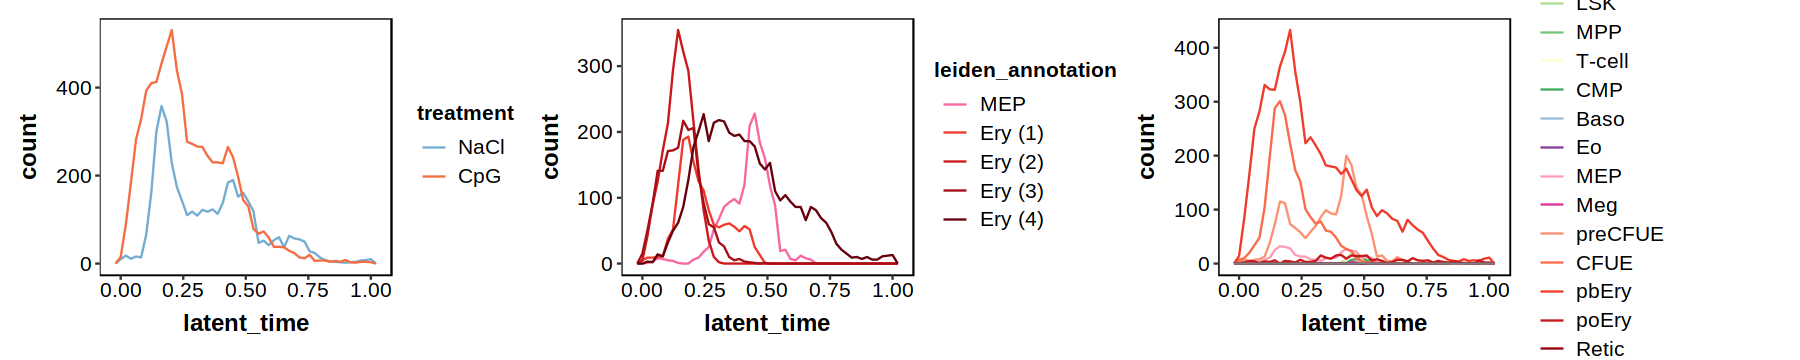

In [15]:
options(repr.plot.width=15, repr.plot.height=3)

dp_1 <- ggplot(so_ery@meta.data, aes(x=latent_time, color=treatment)) + 
    geom_freqpoly(bins=50) + 
    scale_color_manual(values=unlist(color$treatment))

dp_2 <- ggplot(so_ery@meta.data, aes(x=latent_time, color=leiden_annotation)) + 
    geom_freqpoly(bins=50) + 
    scale_color_manual(values=unlist(color$leiden_annotation)[names(color$leiden_annotation) %in% so_ery$leiden_annotation])

dp_3 <- ggplot(so_ery@meta.data, aes(x=latent_time, color=label_fine_haemosphere)) + 
    geom_freqpoly(bins=50) + 
    scale_color_manual(values=unlist(color$label_fine_haemosphere)[names(color$label_fine_haemosphere) %in% so_ery$label_fine_haemosphere])

dp_1 + dp_2 + dp_3 